**Regression**

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
data = torch.linspace(-1,1,100)
print(data) # shape=(1,100)
print(data.shape)
x = torch.unsqueeze(data,dim=1) # from one dimension to two dimensions
print(x) # shape = (100,1)
print(x.shape)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [ ]:
y = x.pow(2)+0.2*torch.rand(x.size())
print(y)
print(y.size())

tensor([[1.1393],
        [1.0432],
        [0.9344],
        [0.9284],
        [1.0080],
        [0.8760],
        [0.9439],
        [0.8538],
        [0.8704],
        [0.7091],
        [0.7113],
        [0.7323],
        [0.7520],
        [0.5620],
        [0.5617],
        [0.5763],
        [0.4688],
        [0.5033],
        [0.5119],
        [0.4822],
        [0.4319],
        [0.5119],
        [0.4272],
        [0.3243],
        [0.3901],
        [0.2925],
        [0.2700],
        [0.2411],
        [0.2171],
        [0.2903],
        [0.2604],
        [0.2123],
        [0.2418],
        [0.1927],
        [0.1737],
        [0.1248],
        [0.1845],
        [0.0727],
        [0.1035],
        [0.0829],
        [0.1345],
        [0.0300],
        [0.1435],
        [0.1081],
        [0.0287],
        [0.0997],
        [0.0920],
        [0.0183],
        [0.1181],
        [0.0603],
        [0.0573],
        [0.1474],
        [0.1438],
        [0.1385],
        [0.0844],
        [0

In [ ]:
# Use variable to initialize backpropogate
x,y = Variable(x), Variable(y)
print(x)
print(y)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

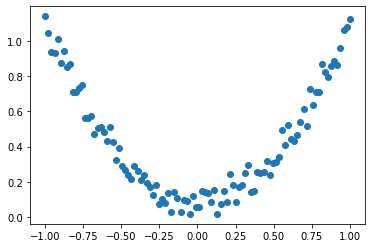

In [ ]:
plt.scatter(x.data.numpy(),y.data.numpy())

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net,self).__init__()
    self.hidden = torch.nn.Linear(n_feature,n_hidden) # Linear(num_input,num_output)
    self.predict = torch.nn.Linear(n_hidden,n_output)
  
  def forward(self, x):
    # x -> linear (self.hidden) -> activation function (relu) -> linear (self.predict)
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x

In [ ]:
# print the structure of the network
net = Net(1,10,1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss() # mean score error loss

In [ ]:
print(x)
print(x.shape)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

In [ ]:
# for visualization
plt.ion()
plt.show()

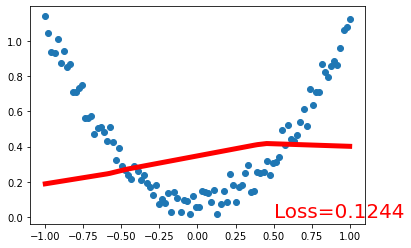

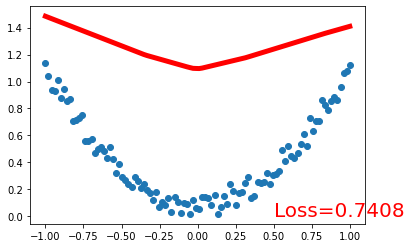

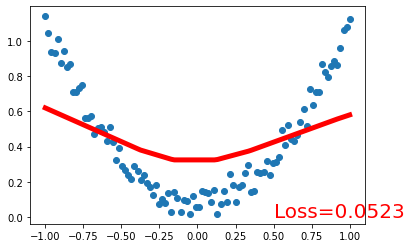

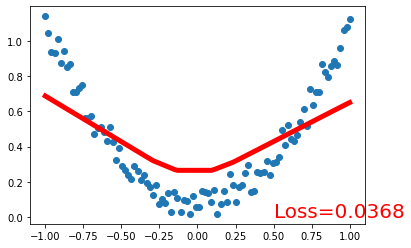

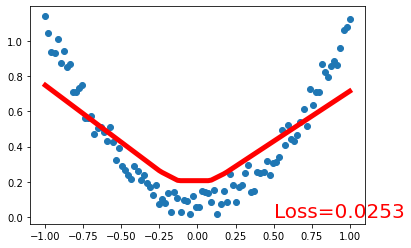

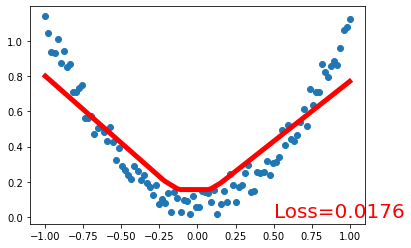

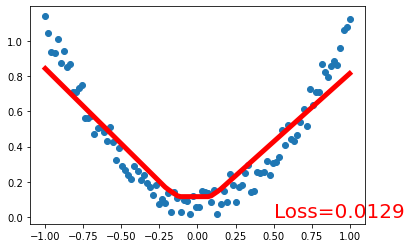

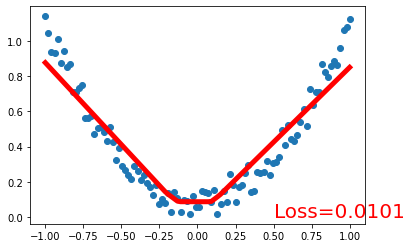

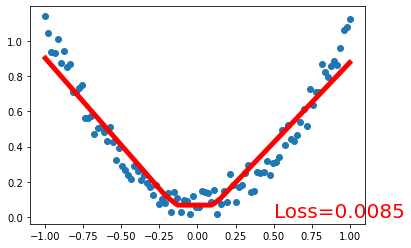

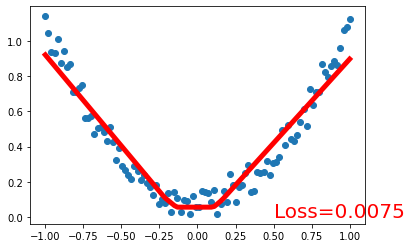

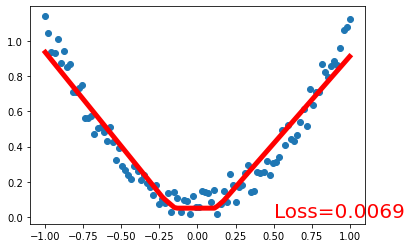

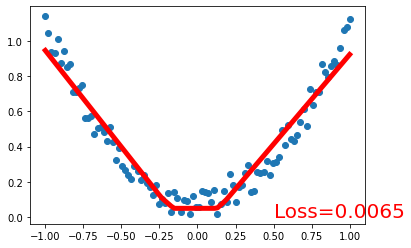

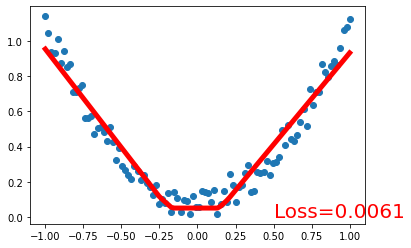

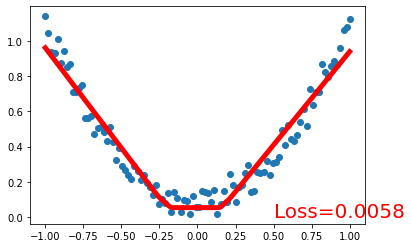

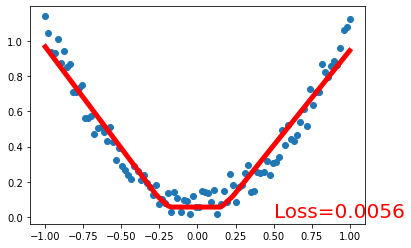

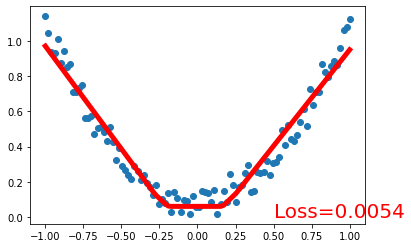

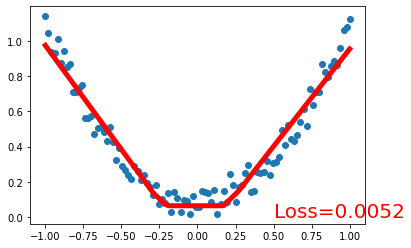

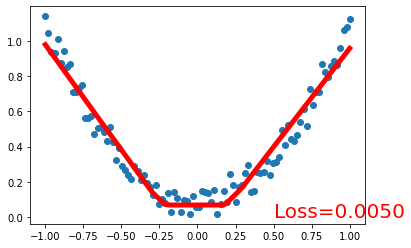

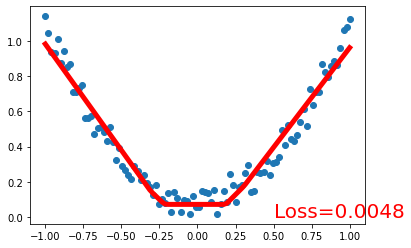

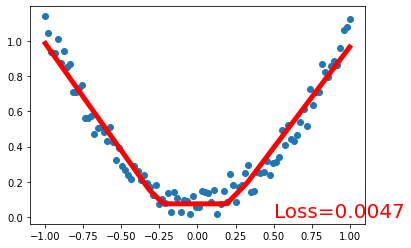

In [ ]:
# Train
for t in range(100):
  prediction = net(x)

  loss = loss_func(prediction,y) # loss_func(prediction, real)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #################### for visualization ###################
  if t % 5 == 0:
    plt.cla()
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f'%loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)

**Classification**

In [ ]:
# data
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)     # class0 x data (tensor), shape=(100,2)
y0 = torch.zeros(100)         # class0 y data (tensor), shape=(100,1)
x1 = torch.normal(-2*n_data, 1)   # class1 x data (tensor), shape=(100,2)
y1 = torch.ones(100)         # class1 y data (tensor), shape=(100,1)

x = torch.cat((x0,x1),0).type(torch.FloatTensor) # FloatTensor = 32-bit floating
y = torch.cat((y0,y1),).type(torch.LongTensor)  # LongTensor = 64-bit integer

print("x0: ", x0)
print("x1: ", x1)
print("x0 shape: ", x0.shape)
print("x1 shape: ", x1.shape)
print("x shape: ", x.shape)
print("y shape: ", y.shape)

x0:  tensor([[ 2.5913,  2.1107],
        [-0.3241,  3.5894],
        [ 1.7376,  1.1506],
        [ 1.9439,  0.4139],
        [ 1.8620,  1.7759],
        [ 1.3270,  2.6019],
        [ 0.8268,  3.0827],
        [ 5.2734,  1.9059],
        [ 2.9887,  2.3200],
        [ 1.4045,  2.6446],
        [ 2.5150,  1.1665],
        [ 3.0508,  2.3665],
        [ 2.5331,  0.0374],
        [ 3.3572,  0.4193],
        [ 0.3073,  1.5327],
        [ 0.5610,  0.2262],
        [ 2.2785,  3.0486],
        [ 1.6039,  3.2848],
        [ 4.1166,  3.8988],
        [-0.0907,  2.3842],
        [ 2.4395,  2.8914],
        [ 0.1222,  2.2326],
        [ 1.3862,  2.8966],
        [ 2.4937,  2.1378],
        [ 3.0512,  1.4722],
        [ 3.6133,  2.3157],
        [ 1.8582,  3.0271],
        [ 1.8545,  1.7716],
        [ 0.3853,  3.3716],
        [ 1.3492,  1.8280],
        [ 1.7110,  1.8151],
        [ 2.2692,  1.5648],
        [ 2.3927,  2.2604],
        [ 2.9407,  1.8250],
        [ 2.4611,  2.4985],
        [ 0.253

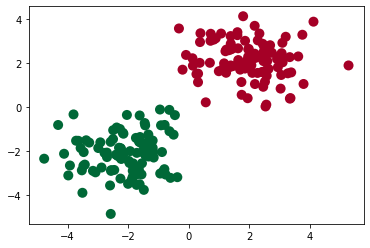

In [ ]:
################ for visualization #####################
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, num_feature, num_hidden, num_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(num_feature,num_hidden)
    self.predict = torch.nn.Linear(num_hidden,num_output)
  
  def forward(self,x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x

In [ ]:
net = Net(2,10,2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(params=net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

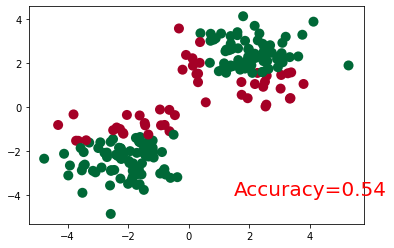

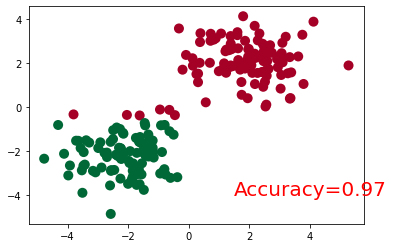

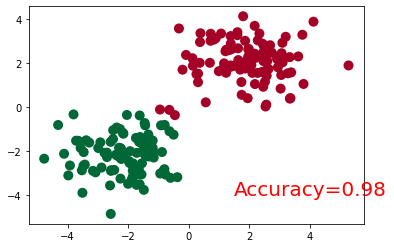

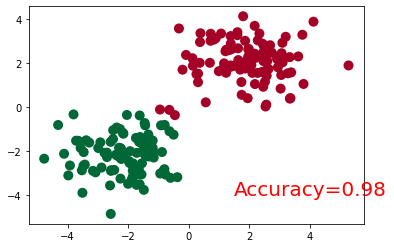

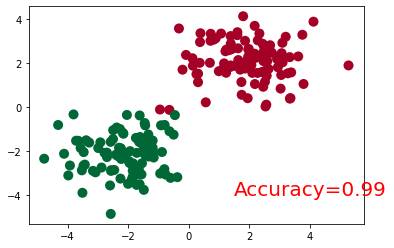

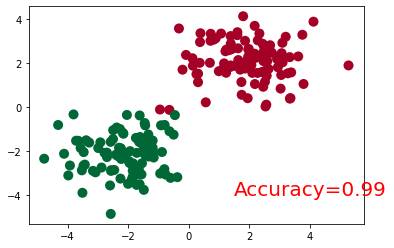

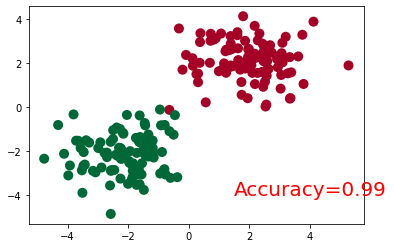

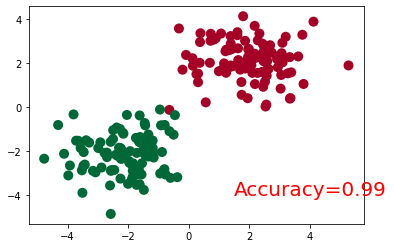

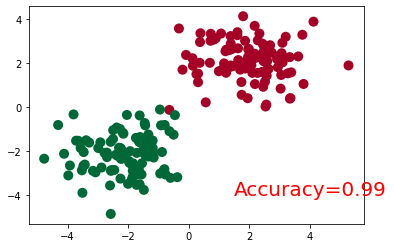

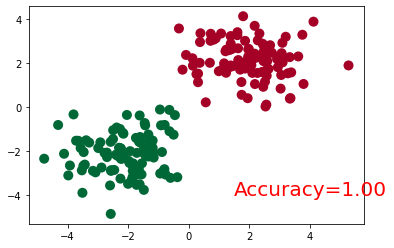

In [ ]:
# Training
for t in range(100):
  out = net(x)

  loss = loss_func(out,y)

  optimizer.zero_grad() # clear up previous iteration
  loss.backward()
  optimizer.step()

  ##################### for visualization ###################
  if t%5 == 0:
    plt.cla()
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)
    if accuracy == 1:
      break